<a href="https://colab.research.google.com/github/khadyja-R/Account-management/blob/main/TP1___Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce lab, vous allez vous familiariser avec l'utilisation de TensorFlow et apprendre comment l'exploiter pour résoudre des tâches de deep learning. Parcourez le code et exécutez chaque cellule. Au fil de l'exercice, vous rencontrerez plusieurs blocs ***TO DO*** -- suivez les instructions pour les compléter avant d'exécuter ces cellules et de continuer.

# Partie 1 : Introduction à TensorFlow

## Installer TensorFlow

TensorFlow est une bibliothèque logicielle largement utilisée en apprentissage automatique. Ici, nous allons apprendre comment les calculs sont représentés et comment définir un réseau de neurones simple dans TensorFlow. Nous utiliserons la dernière version de TensorFlow, TensorFlow 2, qui offre une grande flexibilité et la possibilité d'exécuter des opérations de manière impérative, tout comme en Python. Vous remarquerez que TensorFlow 2 est assez similaire à Python en termes de syntaxe et d'exécution impérative.

In [1]:
# Installons TensorFlow
# !pip install tensorflow

import tensorflow as tf

# Installation de quelques dépendances
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.8/807.8 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.8 MB/s eta 0:00:00


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## 1.1 Pourquoi TensorFlow s'appelle-t-il TensorFlow ?

TensorFlow est appelé "TensorFlow" (en français Tensor = tenseur et Flow = flux)car il gère le flux (nœud/opération mathématique) de Tenseurs, qui sont des structures de données que l'on peut concevoir comme des tableaux multidimensionnels. Les tenseurs sont représentés sous forme de tableaux n-dimensionnels de types de données de base, tels qu'une chaîne de caractères ou un entier — ils fournissent un moyen de généraliser les vecteurs et les matrices à des dimensions supérieures.

La ```shape``` d'un tenseur définit son nombre de dimensions et la taille de chaque dimension. Le ```rank``` d'un tenseur indique le nombre de dimensions (n-dimensions) — on peut également considérer cela comme l'ordre ou le degré du tenseur.

Voyons d'abord les tenseurs de dimension 0, dont un scalaire est un exemple :

In [2]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` est un tenseur de dimension {}.".format(tf.rank(sport).numpy()))
print("`number` est un tenseur de dimension {}.".format(tf.rank(number).numpy()))

`sport` est un tenseur de dimension 0.
`number` est un tenseur de dimension 0.



Les vecteurs et les listes peuvent être utilisés pour créer des tenseurs de dimension 1 :

In [3]:
sports = tf.constant(["Tennis", "Footsalle"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` est un tenseur de dimension {} avec la forme : {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` est un tenseur de dimension {} avec la forme : {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))


`sports` est un tenseur de dimension 1 avec la forme : [2]
`numbers` est un tenseur de dimension 1 avec la forme : [3]


Ensuite, nous allons créer des tenseurs de dimension 2 (c'est-à-dire des matrices) et de rang supérieur. Par exemple, dans les prochains laboratoires portant sur le traitement d'images et la vision par ordinateur, nous utiliserons des tenseurs de dimension 4. Ici, les dimensions correspondent au nombre d'images d'exemples dans notre lot, à la hauteur de l'image, à la largeur de l'image et au nombre de canaux de couleur.

In [5]:
'''TODO : Définir un tenseur de dimension 2'''
matrix =  tf.constant([[1, 2, 3],
                      [4, 5, 6]], dtype=tf.float32)


assert isinstance(matrix, tf.Tensor), "matrix doit être un objet tf Tensor"
assert tf.rank(matrix).numpy() == 2

print("`matrix` est un tenseur de dimension {} avec la forme : {}".format(tf.rank(matrix).numpy(), tf.shape(matrix)))


`matrix` est un tenseur de dimension 2 avec la forme : [2 3]


In [8]:
'''TODO : Définir un tenseur de dimension 4.'''
# Utilisez tf.zeros pour initialiser un tenseur 4-d de zéros de taille 10 x 256 x 256 x 3.
#   Vous pouvez considérer cela comme 10 images où chaque image est RGB 256 x 256.
images =tf.zeros((10, 256, 256, 3), dtype=tf.float32)

assert isinstance(images, tf.Tensor), "images doit être un objet tf Tensor"
assert tf.rank(images).numpy() == 4, "images doit être de rang 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "images a une forme incorrecte"

print("`images` est un tenseur de dimension {} avec la forme : {}".format(tf.rank(images).numpy(), tf.shape(images)))


`images` est un tenseur de dimension 4 avec la forme : [ 10 256 256   3]


Comme vous l'avez vu, le ```shape``` d'un tenseur fournit le nombre d'éléments dans chaque dimension du tenseur. La ```shape``` est très utile et nous l'utiliserons fréquemment. Vous pouvez également utiliser le slicing pour accéder à des sous-tenseurs au sein d'un tenseur de rang supérieur :

In [9]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print("`row_vector` : {}".format(row_vector.numpy()))
print("`column_vector` : {}".format(column_vector.numpy()))
print("`scalar` : {}".format(scalar.numpy()))

`row_vector` : [4. 5. 6.]
`column_vector` : [2. 5.]
`scalar` : 2.0


## 1.2 Calculs sur les tenseurs

Une façon pratique de concevoir et de visualiser les calculs dans TensorFlow est de les envisager sous forme de graphes. Nous pouvons définir ce graphe en termes de tenseurs, qui contiennent des données, et des opérations mathématiques qui agissent sur ces tenseurs dans un certain ordre. Examinons un exemple simple et définissons ce calcul en utilisant TensorFlow :

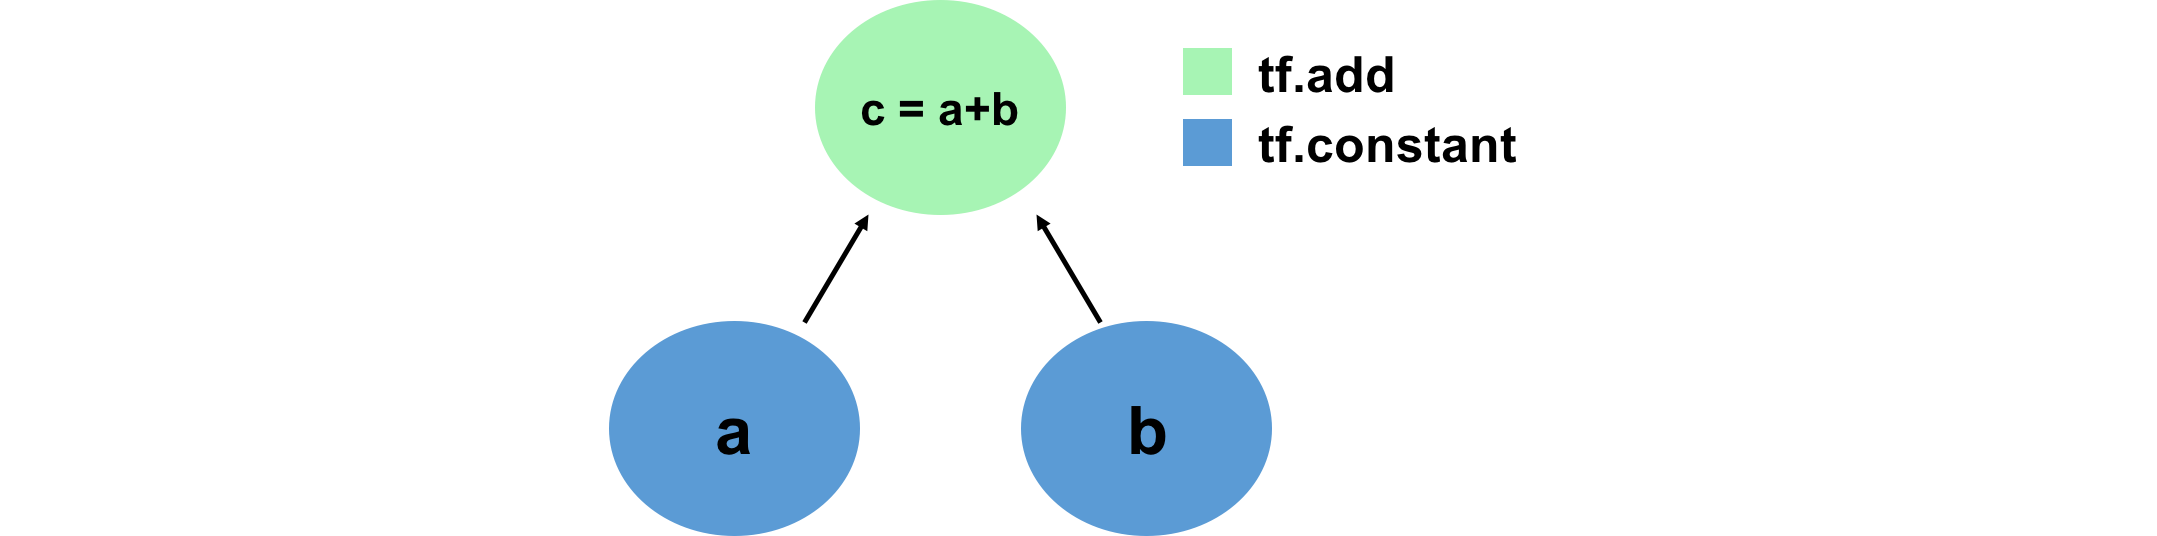

In [10]:
# Créez les nœuds dans le graphe et initialisez les valeurs en utilisant tf.constant(...)
a = tf.constant(5)
b = tf.constant(3)

# Additionnez-les
c1 = tf.add(a, b)
c2 = a + b  # TensorFlow surcharge l'opérateur "+" pour qu'il puisse agir sur les tenseurs
print(c1)
print(c2)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


Remarquez comment nous avons créé un graphe de calcul composé d'opérations TensorFlow, et comment la sortie est un tenseur avec la valeur 76 — nous venons de créer un graphe de calcul constitué d'opérations, qui a été exécuté et nous a renvoyé le résultat.

Examinons maintenant un exemple légèrement plus complexe :

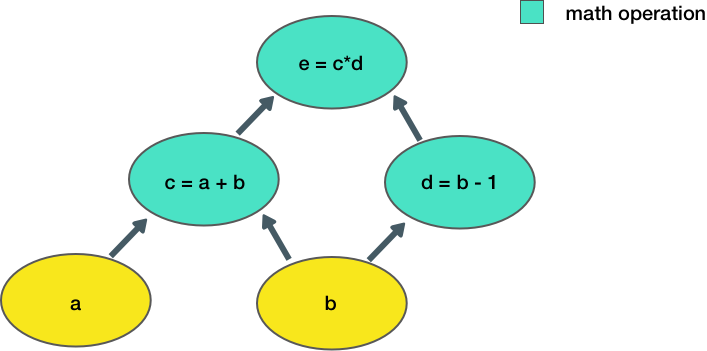

Ici, nous prenons deux entrées, `a` et `b`, et calculons une sortie `e`. Chaque nœud dans le graphe représente une opération qui prend une entrée, effectue un calcul et transmet sa sortie à un autre nœud.

Définissons une fonction simple dans TensorFlow pour construire cette fonction de calcul :

In [11]:
### Définition des calculs sur les tenseurs

# Construire une fonction de calcul simple
def func(a, b):
    '''Effectue des opérations simples sur deux tenseurs a et b'''
    c = tf.add(a, b)        # addition
    d = tf.subtract(a, b)   # soustraction
    e = tf.multiply(c, d)   # multiplication de c et d
    return e


Nous pouvons maintenant appeler cette fonction pour exécuter le graphe de calcul avec certaines entrées `a` et `b` :

In [12]:
# Considérons des valeurs d'exemple pour a et b
a, b = 1.5, 2.5
# Exécuter le calcul
e_out = func(a, b)
print(e_out)

tf.Tensor(-4.0, shape=(), dtype=float32)


Remarquez que notre sortie est un tenseur avec une valeur définie par le résultat du calcul, et que cette sortie n'a pas de forme car il s'agit d'une valeur scalaire unique.

# Partie 2 : Perceptron en utilisant TensorFlow et Python

## 2.1 Réseaux de neurones dans TensorFlow

Nous pouvons également définir des réseaux de neurones dans TensorFlow. TensorFlow utilise une API de haut niveau appelée [Keras](https://www.tensorflow.org/guide/keras) qui fournit un cadre puissant et intuitif pour construire et entraîner des modèles de deep learning.

Considérons d'abord l'exemple d'un perceptron simple défini par une seule couche dense : $ y = \sigma(Wx + b)$, où $W$  représente une matrice de poids, $b$ est un biais, $x$ est l'entrée, $\sigma$ est la fonction d'activation sigmoïde, et $y$ est la sortie. Nous pouvons également visualiser cette opération à l'aide d'un graphe :

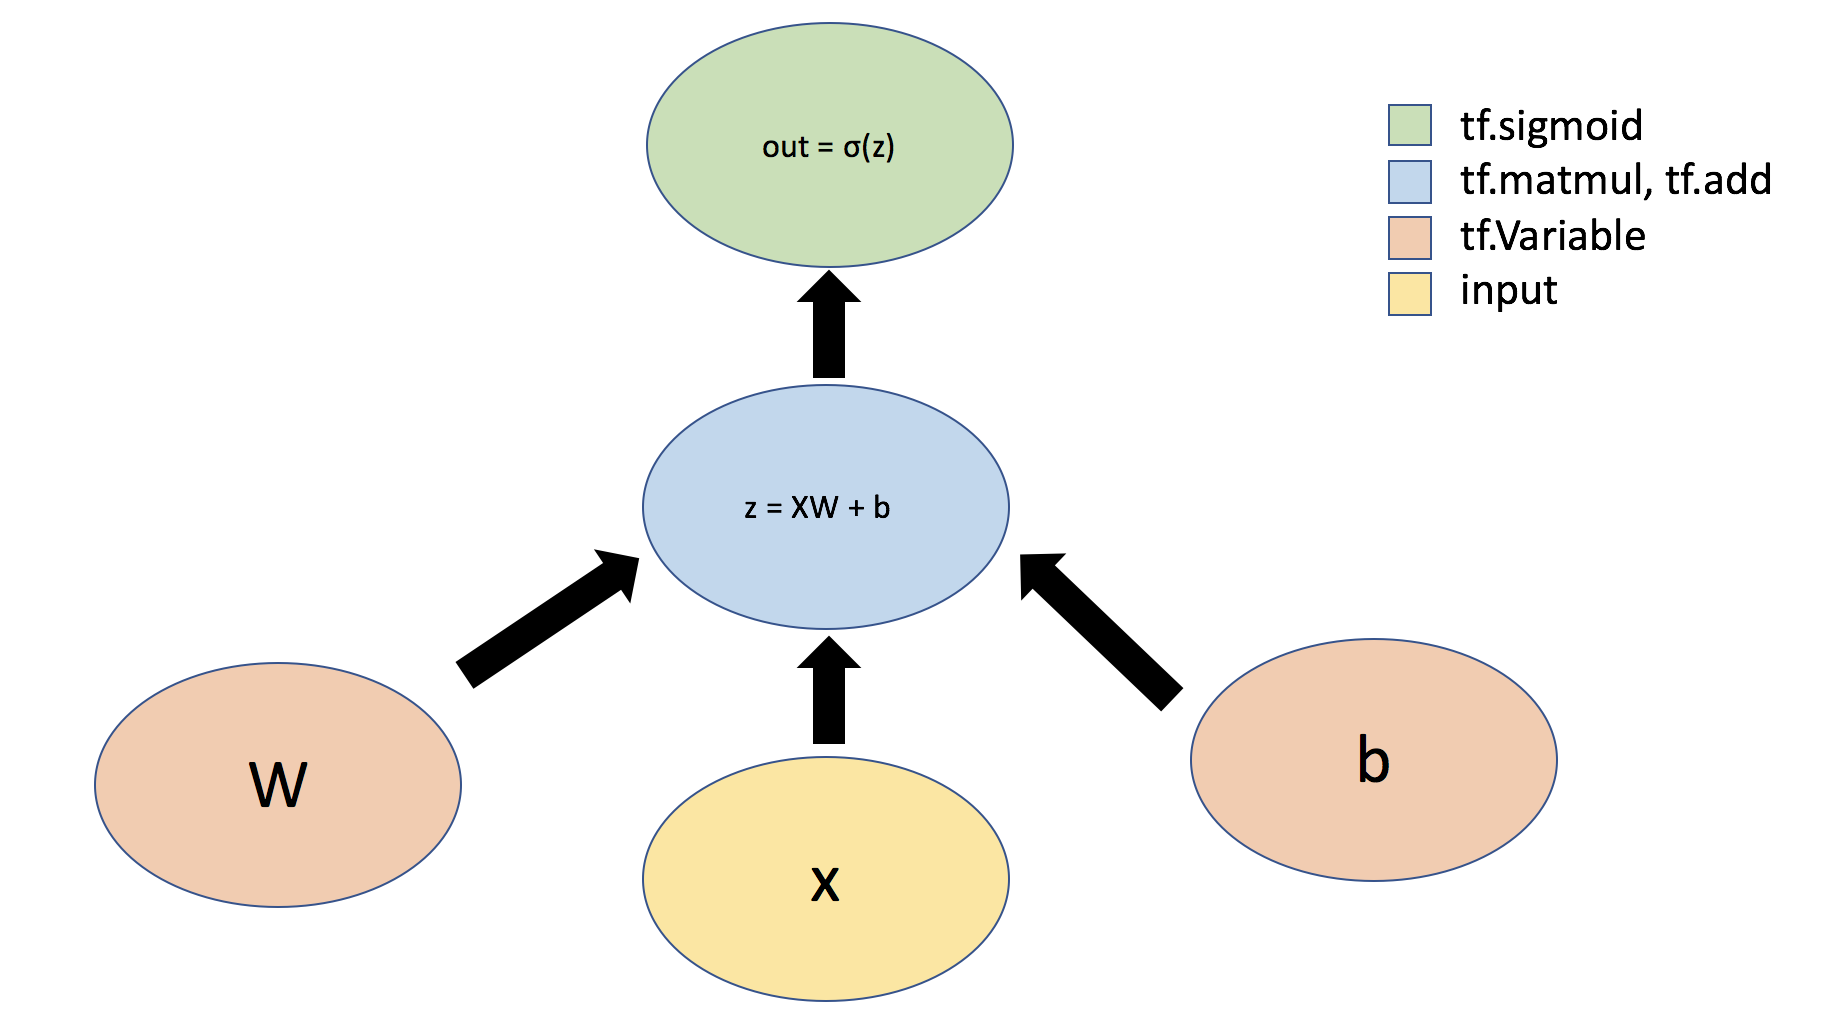

Les tenseurs peuvent circuler à travers des types abstraits appelés [```Layers```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) — les blocs de construction des réseaux de neurones. Les ```Layers``` implémentent des opérations courantes des réseaux de neurones et sont utilisés pour mettre à jour les poids, calculer les pertes et définir la connectivité entre les couches. Nous allons d'abord définir une ```Layer``` pour implémenter le perceptron simple défini ci-dessus.

In [15]:
### Définition d'une couche de réseau

# n_output_nodes : nombre de nœuds de sortie
# input_shape : forme de l'entrée
# x : entrée de la couche

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Définir et initialiser les paramètres : une matrice de poids W et un biais b
    # Notez que l'initialisation des paramètres est aléatoire !
    self.W = self.add_weight(shape=[d, self.n_output_nodes], name="weight")
    self.b = self.add_weight(shape=[1, self.n_output_nodes], name="bias")


  def call(self, x):
    '''TODO : définir l'opération pour z (indice : utilisez tf.matmul)'''
    z =tf.matmul(x, self.W) + self.b  # multiplication matricielle + ajout du biais

    '''TODO : définir l'opération pour out (indice : utilisez tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

# Comme les paramètres de la couche sont initialisés de manière aléatoire, nous définirons une graine aléatoire pour la reproductibilité
tf.keras.utils.set_random_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test de la sortie !
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)


[[0.27064407 0.18269512 0.50374055]]
[PASS] test_custom_dense_layer_output


True

De manière pratique, TensorFlow a défini un certain nombre de ```Layers``` couramment utilisés dans les réseaux de neurones, par exemple une couche [```Dense```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable). Maintenant, au lieu d'utiliser une seule ```Layer``` pour définir notre réseau de neurones simple, nous allons utiliser le modèle [`Sequential`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) de Keras et une seule couche [`Dense`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) pour définir notre réseau. Avec l'API `Sequential`, vous pouvez facilement créer des réseaux de neurones en empilant des couches comme des blocs de construction.

In [16]:
### Définition d'un réseau de neurones avec l'API Sequential

# Importer les packages pertinents
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Définir le nombre de sorties
n_output_nodes = 3

# D'abord, définir le modèle
model = Sequential()

'''TODO : Définir une couche dense (complètement connectée) pour calculer z'''
# Rappel : les couches denses sont définies par les paramètres W et b !
# Vous pouvez en savoir plus sur l'initialisation de W et b dans la documentation TF :)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer =  Dense(
    units=n_output_nodes,      # nombre de nœuds de sortie
    input_shape=(2,),          # forme de l'entrée (par exemple 2 features)
    activation='sigmoid'       # fonction d'activation (ici sigmoïde)
)

# Ajouter la couche dense au modèle
model.add(dense_layer)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nous avons défini notre modèle en utilisant l'API Sequential. Maintenant, nous pouvons le tester avec une entrée d'exemple :

In [17]:
# Tester le modèle avec une entrée d'exemple
x_input = tf.constant([[1, 2.]], shape=(1, 2))

'''TODO : alimenter le modèle avec l'entrée et prédire la sortie !'''
model_output = model(x_input)
print(model_output)

tf.Tensor([[0.18752207 0.23909676 0.3213029 ]], shape=(1, 3), dtype=float32)


En plus de définir des modèles en utilisant l'API `Sequential`, nous pouvons également définir des réseaux de neurones en sous-classant directement la classe [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=stable), qui regroupe les couches pour permettre l'entraînement et l'inférence du modèle. La classe `Model` représente ce que l'on appelle un "modèle" ou un "réseau". En utilisant le sous-classement, nous pouvons créer une classe pour notre modèle, puis définir le passage avant dans le réseau en utilisant la fonction `call`. Le sous-classement offre la flexibilité nécessaire pour définir des couches, des boucles d'entraînement, des fonctions d'activation et des modèles personnalisés. Définissons le même réseau de neurones que précédemment, cette fois en utilisant le sous-classement au lieu du modèle `Sequential`.

In [18]:
### Définition d'un modèle en utilisant le sous-classement
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # Dans __init__, nous définissons les couches du modèle
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO : Notre modèle se compose d'une seule couche Dense. Définissez cette couche.'''
    self.dense_layer = '''TODO : Couche Dense'''

  # Dans la fonction call, nous définissons le passage avant du modèle
  def call(self, inputs):
    return self.dense_layer(inputs)


Comme pour le modèle que nous avons construit en utilisant l'API `Sequential`, testons notre `SubclassModel` avec une entrée d'exemple.

In [19]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model_output.numpy())

[[0.18752207 0.23909676 0.3213029 ]]


Il est important de noter que le sous-classement nous offre une grande flexibilité pour définir des modèles personnalisés. Par exemple, nous pouvons utiliser des arguments booléens dans la fonction `call` pour spécifier différents comportements du réseau, par exemple des comportements différents pendant l'entraînement et l'inférence. Supposons que, dans certains cas, nous souhaitions que notre réseau renvoie simplement l'entrée, sans aucune modification. Nous définissons un argument booléen `isidentity` pour contrôler ce comportement :

In [20]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(Model):
    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        # Si isidentity est True, renvoyer l'entrée telle quelle
        if isidentity:
            return inputs
        else:
            return x

# Exemple d'utilisation
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1., 2.]], shape=(1,2))

# Sortie normale (couche dense)
y_dense = model(x_input)
print("Sortie Dense :", y_dense.numpy())

# Sortie identité (entrée inchangée)
y_identity = model(x_input, isidentity=True)
print("Sortie Identité :", y_identity.numpy())


Sortie Dense : [[0.82794297 0.155684   0.567044  ]]
Sortie Identité : [[1. 2.]]


Testons ce comportement :



In [22]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1, 2.]], shape=(1, 2))
'''TODO : passer l'entrée dans le modèle et appeler avec et sans l'option d'identité d'entrée.'''
out_activate = model(x_input)                # sortie normale via la couche dense
out_identity = model(x_input, isidentity=True)  # sortie identité (entrée inchangée)
print("Sortie du réseau avec activation : {}; sortie du réseau en mode identité : {}".format(out_activate.numpy(), out_identity.numpy()))

Sortie du réseau avec activation : [[0.57467866 0.61822414 0.88219965]]; sortie du réseau en mode identité : [[1. 2.]]


Maintenant que nous avons appris à définir des `Layers` ainsi que des réseaux de neurones dans TensorFlow en utilisant à la fois les API `Sequential` et le sous-classement, nous sommes prêts à nous pencher sur l'implémentation de l'entraînement des réseaux avec la rétropropagation.

## 2.2 Différentiation automatique dans TensorFlow

La [différentiation automatique](https://en.wikipedia.org/wiki/Automatic_differentiation) est l'un des aspects les plus importants de TensorFlow et constitue l'épine dorsale de l'entraînement avec la [rétropropagation](https://en.wikipedia.org/wiki/Backpropagation). Nous utiliserons le GradientTape de TensorFlow [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable) pour tracer les opérations afin de calculer les gradients par la suite.

Lorsqu'un passage avant est effectué dans le réseau, toutes les opérations du passage avant sont enregistrées sur une "bande". Ensuite, pour calculer le gradient, la bande est lue en sens inverse. Par défaut, la bande est supprimée après avoir été utilisée en sens inverse ; cela signifie qu'un `tf.GradientTape` particulier ne peut calculer qu'un seul gradient, et les appels suivants génèrent une erreur d'exécution. Cependant, nous pouvons calculer plusieurs gradients pour le même calcul en créant une bande de gradients ```persistante```.

D'abord, nous allons voir comment calculer des gradients en utilisant GradientTape et y accéder pour effectuer des calculs. Nous définissons la fonction simple $ y = x^2 $ et calculons le gradient :

In [23]:
### Calcul de gradient avec GradientTape

# y = x^2
# Exemple : x = 3.0
x = tf.Variable(3.0)

# Initialiser la bande de gradient
with tf.GradientTape() as tape:
  # Définir la fonction
  y = x * x
# Accéder au gradient — dérivée de y par rapport à x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0


Lors de l'entraînement des réseaux de neurones, nous utilisons la différentiation et la descente de gradient stochastique (SGD) pour optimiser une fonction de perte. Maintenant que nous comprenons comment utiliser `GradientTape` pour calculer et accéder aux dérivées, examinons un exemple où nous utilisons la différentiation automatique et la SGD pour trouver le minimum de $ L = (x - x_f)^2 $. Ici, $ x_f $ est une variable pour une valeur cible que nous essayons d'atteindre ; $ L $ représente une perte que nous cherchons à minimiser. Bien que nous puissions résoudre ce problème analytiquement ($ x_{min} = x_f $), comprendre comment le calculer avec `GradientTape` nous prépare bien pour les prochains laboratoires où nous utiliserons la descente de gradient pour optimiser les pertes de réseaux de neurones entiers.

Initialisation de x = [[-1.1012203]]


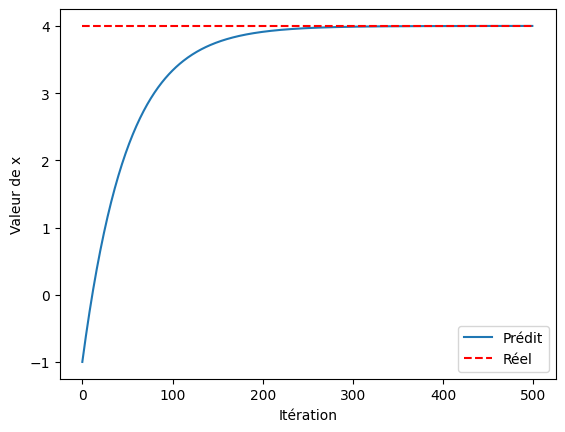

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Initialiser une valeur aléatoire pour x
x = tf.Variable([tf.random.normal([1])])
print("Initialisation de x = {}".format(x.numpy()))

learning_rate = 1e-2
history = []
x_f = 4  # valeur cible

# SGD pour minimiser la perte
for i in range(500):
    with tf.GradientTape() as tape:
        # Définir la perte comme la distance au carré par rapport à x_f
        loss = tf.square(x - x_f)  # (x - x_f)^2

    # Calcul du gradient
    grad = tape.gradient(loss, x)

    # Mise à jour de x avec SGD
    x.assign_sub(learning_rate * grad)  # équivalent à x = x - lr * grad
    history.append(x.numpy()[0])

# Tracer l'évolution de x
plt.plot(history)
plt.plot([0, 500], [x_f, x_f], 'r--')
plt.legend(('Prédit', 'Réel'))
plt.xlabel('Itération')
plt.ylabel('Valeur de x')
plt.show()


`GradientTape` offre un cadre extrêmement flexible pour la différentiation automatique. Afin de rétropropager les erreurs à travers un réseau de neurones, nous traçons les passages avant sur la bande (Tape), utilisons ces informations pour déterminer les gradients, puis utilisons ces gradients pour l'optimisation via la SGD.

## 2.3 : Perceptron multicouche

Nous allons maintenant nous concentrer sur un exemple plus avancé en utilisant des perceptrons pour classer des images. Dans le reste du lab, nous utiliserons le jeu de données MNIST de chiffres manuscrits.

Commençons par télécharger les données.



In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Charger le jeu de données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliser les images (valeurs entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

# Vérification des shapes
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28) y_train: (60000, 10)
x_test: (10000, 28, 28) y_test: (10000, 10)


Une étape importante avant d'entraîner le modèle sur un jeu de données donné consiste à examiner les données et leur distribution afin de réaliser une préparation adéquate avant l'entraînement.

In [26]:
import pandas as pd
from tensorflow.keras.datasets import mnist

# Charger le jeu de données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pour l'ensemble d'entraînement
class_distribution_train = pd.Series(y_train.flatten()).value_counts().sort_index()
print("Distribution des classes dans l'ensemble d'entraînement :")
print(class_distribution_train)

# Pour l'ensemble de test
class_distribution_test = pd.Series(y_test.flatten()).value_counts().sort_index()
print("Distribution des classes dans l'ensemble de test :")
print(class_distribution_test)

# Si tu as séparé un ensemble de validation à partir de l'entraînement, par exemple 10%
val_split = int(0.1 * len(x_train))
x_val = x_train[:val_split]
y_val = y_train[:val_split]
class_distribution_val = pd.Series(y_val.flatten()).value_counts().sort_index()
print("Distribution des classes dans l'ensemble de validation :")
print(class_distribution_val)


Distribution des classes dans l'ensemble d'entraînement :
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64
Distribution des classes dans l'ensemble de test :
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64
Distribution des classes dans l'ensemble de validation :
0    592
1    671
2    581
3    608
4    623
5    514
6    608
7    651
8    551
9    601
Name: count, dtype: int64


Étant donné que nous utilisons un jeu de données d'images, un exemple visuel du jeu de données est nécessaire. Traçons un exemple pour chaque classe :

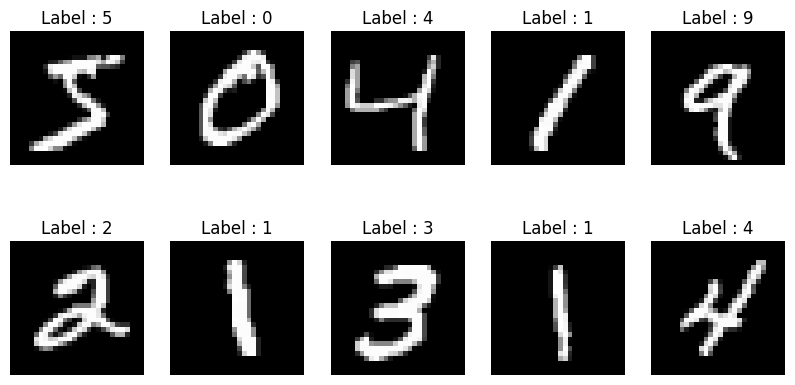

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)          # placer les images dans une grille 2x5
    plt.imshow(x_train[i], cmap='gray')  # afficher l'image en niveaux de gris
    plt.title(f'Label : {y_train[i]}')   # afficher le label
    plt.axis('off')                      # retirer les axes
plt.show()


Créez maintenant un perceptron qui prendra comme entrée l'image aplatie sous forme de vecteur.

In [28]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Hyperparamètres
batch_size = 64
epochs = 10
input_shape = (28, 28, 1)

# Définir le modèle
model = Sequential()
model.add(Flatten(input_shape=input_shape))           # aplatir les images 28x28 en vecteur 784
model.add(Dense(128, activation='relu'))             # première couche dense avec 128 neurones
model.add(Dense(64, activation='relu'))              # deuxième couche dense avec 64 neurones
model.add(Dense(10, activation='softmax'))           # couche de sortie avec 10 neurones (classes) et softmax

# Compiler le modèle
model.compile(
    loss='categorical_crossentropy',                 # loss pour classification multi-classes
    optimizer='adam',                                # optimiseur Adam
    metrics=['accuracy']
)

# Afficher le résumé du modèle
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Prétraitement des données

In [29]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Corriger la dimension pour inclure le canal (28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Normalisation des valeurs (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Convertir les étiquettes en one-hot
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical  = to_categorical(y_test, num_classes=10)

# Vérification des shapes
print("x_train:", x_train.shape, "y_train:", y_train_categorical.shape)
print("x_test:", x_test.shape, "y_test:", y_test_categorical.shape)


x_train: (60000, 28, 28, 1) y_train: (60000, 10)
x_test: (10000, 28, 28, 1) y_test: (10000, 10)


Entraînez le modèle et affichez les résultats du test

In [30]:
# Entraîner le modèle
history = model.fit(
    x_train,
    y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,   # 10% des données pour validation
    verbose=2
)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f'Précision sur l\'ensemble de test : {test_acc * 100:.2f}%')


Epoch 1/10
844/844 - 6s - 7ms/step - accuracy: 0.9134 - loss: 0.2959 - val_accuracy: 0.9693 - val_loss: 0.1125
Epoch 2/10
844/844 - 4s - 4ms/step - accuracy: 0.9641 - loss: 0.1206 - val_accuracy: 0.9750 - val_loss: 0.0867
Epoch 3/10
844/844 - 4s - 5ms/step - accuracy: 0.9756 - loss: 0.0815 - val_accuracy: 0.9747 - val_loss: 0.0846
Epoch 4/10
844/844 - 4s - 5ms/step - accuracy: 0.9826 - loss: 0.0599 - val_accuracy: 0.9773 - val_loss: 0.0830
Epoch 5/10
844/844 - 4s - 4ms/step - accuracy: 0.9872 - loss: 0.0451 - val_accuracy: 0.9788 - val_loss: 0.0822
Epoch 6/10
844/844 - 4s - 4ms/step - accuracy: 0.9906 - loss: 0.0335 - val_accuracy: 0.9780 - val_loss: 0.0823
Epoch 7/10
844/844 - 5s - 5ms/step - accuracy: 0.9921 - loss: 0.0274 - val_accuracy: 0.9773 - val_loss: 0.0869
Epoch 8/10
844/844 - 3s - 4ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9763 - val_loss: 0.0956
Epoch 9/10
844/844 - 3s - 4ms/step - accuracy: 0.9937 - loss: 0.0201 - val_accuracy: 0.9787 - val_loss: 0.0950
E

Tâche finale : afficher la courbe d'apprentissage.

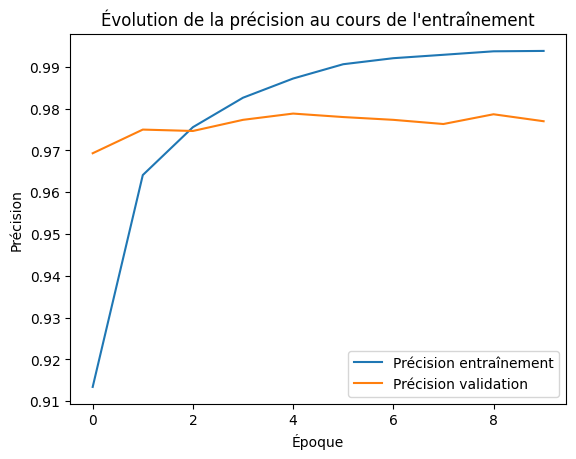

In [31]:
import matplotlib.pyplot as plt

# Tracer la précision d'entraînement et de validation
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision au cours de l\'entraînement')
plt.legend()
plt.show()
